<h1>Video Games Sales Analysis</h1>

This project is aimed at exploring sales of the videogames industry. Exploratory Data Analysis (EDA) will be conducted to identify which __gaming plaforms has seen the most sales__ and also which videogame Publisher is __dominant in the videogame industry interms of sales volume__. 

The study involves the following sections:

1. Data Validation - Initial data overview, data cleaning
2. Exploratory Data Analysis - Visualizing data through barplots of sales and lineplots showing changes over time

In [256]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [257]:
df = pd.read_csv('vgsales.csv')
game = df.copy()
game

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [258]:
game.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


The above reveals the dataset columns:

1. Name : Name of the game
2. Platform : Platform of the games release (i.e. PC,PS4, etc.)
3. Year : Year the game was released in
4. Genre : Genre of the game
5. Publisher : Publisher of the game
6. NA_Sales : Number of sales in North America (in millions)
7. EU_Sales : Number of sales in Europe (in millions)
8. JP_Sales : Number of sales in Japan (in millions)
9. Other_Sales : Number of sales in other parts of the world (in millions)
10. Global_Sales : Number of total sales (in millions)

In [259]:
game.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [260]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [261]:
# Printing a Pandas Series showing any columns that contains missing values and the respective missing value sum for that column
col_with_na = game.isna().sum().sort_values(ascending = False)
col_with_na_only = col_with_na[col_with_na > 0]


# Creating column with the percentage 
col_with_na_only_perc = (round((col_with_na_only/len(game)),4) * 100).map('{:.2f}%'.format)

# Combining the count of missing values with the percent
combined_missing = pd.concat([col_with_na_only, col_with_na_only_perc], axis=1).rename(columns = {0: 'Sum of missing values', 1: 'Percentage of total'})
combined_missing.head()

,Sum of missing values,Percentage of total
Year,271,1.63%
Publisher,58,0.35%


In [262]:
game.isnull().sum()
game = game.dropna()

In [263]:
len(game)

16291

In [264]:
# Check the data for duplicate observations
game_dup = game.duplicated().sum()
print(f'The number of duplicate observations is {game_dup}')

# Check for games which may have duplicated 'Name'
game_name_dup = game.duplicated(subset = 'Name')
game[game_name_dup].head(10)

The number of duplicate observations is 0


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
35,36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
37,38,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
40,41,Call of Duty: Black Ops,PS3,2010.0,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
44,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
55,56,Call of Duty: Modern Warfare 2,PS3,2009.0,Shooter,Activision,4.99,3.69,0.38,1.63,10.69
56,57,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57
59,60,Super Mario 64,DS,2004.0,Platform,Nintendo,5.08,3.11,1.25,0.98,10.42
67,68,Call of Duty: Ghosts,PS3,2013.0,Shooter,Activision,4.09,3.73,0.38,1.38,9.59
101,102,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,Activision,4.52,2.09,0.01,0.67,7.30


In [265]:
# Inspect the number of unique values for categorical variable
game_catcount = game.select_dtypes(include=['object']).nunique().head()
game_catcount

Name         11325
Platform        31
Genre           12
Publisher      576
dtype: int64

In [266]:
# Get the 'Year' column from games_df
game_year = game['Year'].astype('int')

# Extract just the years from the DATE_SOLD column into a list, then print them in a string
print(f'The dataset contains games that were published between the years of {game_year.min()} and year {game_year.max()}')

The dataset contains games that were published between the years of 1980 and year 2020


__Insights__

- The original dataset consisted of 16,598 observations, but after dropping rows with missing values using the dropna function, there are now 16,291, each relating to a unique video game and its features. Observations which had missing values in the <code>Year</code> and <code>Publisher</code> column were removed as they together only accounted for at most 2% of the total data. Given more time and research, the missing values could be imputed manually for each observation. 
- There are no row duplicates in the DataFrame. Although the <code>Name</code> column does have duplicates, they refer to the same game published for different platforms with their corresponding sales, and hence are considered a unique entry.
- There are 3 categorical variables, and inspecting them reveals that there exist 31 unique values for <code>Platform</code>, 12 for <code>Genre</code> and 576 for <code>Publisher</code>.
- Dataset includes games that were published between the years of 1980 and 2020.

## 🔎 2. __Analyzing Total Sales per Region__

Now that the data has been validated and missing values have been addressed, let's explore and visualize the dataset in more detail.

### __Analysing Relationships between Sales numbers, Region of Sales, and Gaming Platforms__

Let's visualize video game sales by <code>Region</code>, by <code>Platform</code>, and then by both, to compare and gauge differences in sales for the regions included in the dataset, and popularity of gaming platforms.

Game sales per region in millions:
NA_Sales 4327.65
EU_Sales 2406.69
JP_Sales 1284.27
Other_Sales 788.91


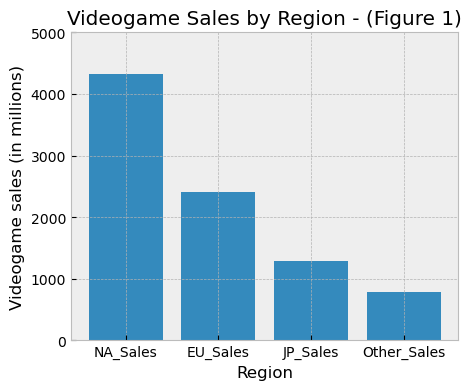

In [267]:
# Set plotting style
plt.style.use('bmh')

# Subset DataFrame to include only the number of sales per region, then print the totals per region
games_region_total_sales = game[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

print('Game sales per region in millions:')
for lab, row in games_region_total_sales.items():
	print(('%s %.2f') % (lab, row))
  
# Ploting the sales per region in a bar graph for a graphic comparative analysis
x_labels = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']

# Setting figure size
plt.figure(figsize=(5, 4))

# Setting labels
plt.title('Videogame Sales by Region - (Figure 1)')
plt.ylabel('Videogame sales (in millions)')
plt.xlabel('Region')

# Setting y-range
plt.ylim(0, 5000)

# Creating a barplot of total videogame sales by Region
plt.bar(x_labels, games_region_total_sales)
plt.show()

In [268]:
# Identifying how many game titles belong to each platform
titles_per_platforms = game[['Platform']].value_counts().rename('Number of Game Titles Releases')
print(titles_per_platforms.head())

# Identify the total global sales per platform
games_sales_per_platform_df = game.groupby('Platform')[['Platform','Global_Sales']].sum('Global_Sales').sort_values(by='Global_Sales', ascending=False)

# Rename the columns of the DataFrame for clarity
games_sales_per_platform_df.rename(columns={'Global_Sales': 'Global Videogame Sales (in Millions)'}, inplace=True)

# Merge the Pandas Series with the DataFrame
games_platform_sales_and_releases_df = games_sales_per_platform_df.merge(titles_per_platforms, how='left', on='Platform')

games_platform_sales_and_releases_df.head(40)

Platform
DS          2131
PS2         2127
PS3         1304
Wii         1290
X360        1234
Name: Number of Game Titles Releases, dtype: int64


,Global Videogame Sales (in Millions),Number of Game Titles Releases
Platform,,
PS2,1233.46,2127
X360,969.60,1234
PS3,949.35,1304
Wii,909.81,1290
DS,818.91,2131
PS,727.39,1189
GBA,305.62,786
PSP,291.71,1197
PS4,278.10,336


In [269]:
# Creating an index list in alphabetical order to reindex each DataFrame subset generated
platform_unique = sorted(game.Platform.unique())
print(platform_unique)

print('\n')

def region_sales_per_platform(region, data=game):
    sales_per_platform = data.groupby('Platform')[region].sum().reindex(platform_unique)
    return sales_per_platform

# Selecting columns from games which relate to the number of sales in a region
regions_list = game.columns[game.columns.str.contains("Sales")]
for region in regions_list:
    print(region)
    
print('\n')

# Creating a dictionary that dynamically stores the region names as keys, and the sum of sales per platform in that region as values
region_sales_per_platform_dict={}

for region in regions_list:
    key = region + '_per_platform'
    region_sales_per_platform_dict[key] = region_sales_per_platform(region)

# Checking for dictionary key names
print(region_sales_per_platform_dict.keys())

# Transforming dictionary items into individual variables
locals().update(region_sales_per_platform_dict)

['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']


NA_Sales
EU_Sales
JP_Sales
Other_Sales
Global_Sales


dict_keys(['NA_Sales_per_platform', 'EU_Sales_per_platform', 'JP_Sales_per_platform', 'Other_Sales_per_platform', 'Global_Sales_per_platform'])


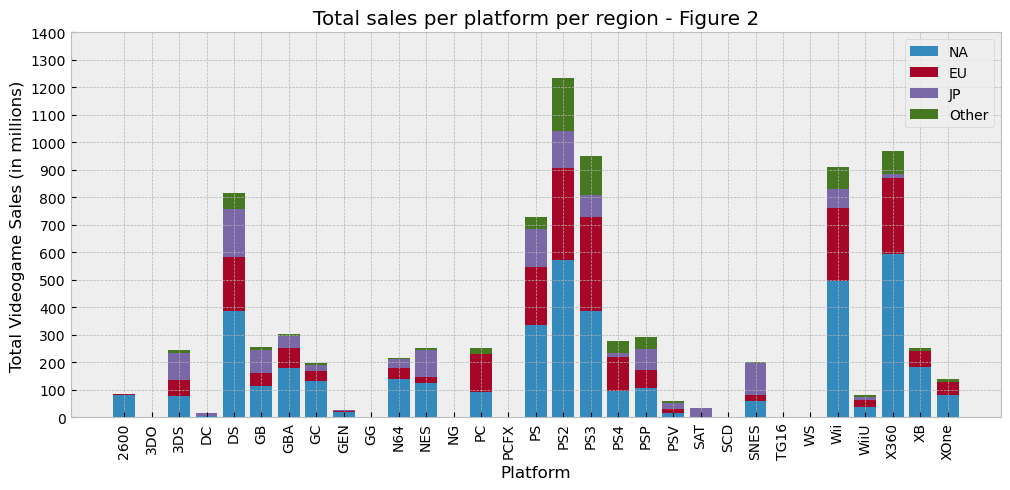

In [270]:
# Create figure and axis object
fig, ax = plt.subplots(figsize=(12, 5))

# Create a stacked bar plot of total sales per platform coloured by the region of sale
ax.bar(platform_unique, NA_Sales_per_platform, label='NA')
ax.bar(platform_unique, EU_Sales_per_platform, label='EU', bottom=NA_Sales_per_platform)
ax.bar(platform_unique, JP_Sales_per_platform, label='JP', bottom=NA_Sales_per_platform + EU_Sales_per_platform)
ax.bar(platform_unique, Other_Sales_per_platform, label='Other', bottom=NA_Sales_per_platform + EU_Sales_per_platform + JP_Sales_per_platform)

# Set labels
ax.set_ylabel('Total Videogame Sales (in millions)')
ax.set_xlabel('Platform')
ax.set_title('Total sales per platform per region - Figure 2')

# Add legend
ax.legend()

# Format ticks
plt.yticks(np.arange(0, max(Global_Sales_per_platform) + 200, 100))
plt.xticks(rotation = 90)

plt.show()

### Insights on Relationships between Sales numbers, Region of Sales, and Gaming Platforms

- Figure 1 shows that North America accounts for most video game sales internationally with 4.3 billion sales, followed by Europe and then Japan. All other international video game sales outside of NA, EU and JP make up for less sales than Japan alone as a country!

- The 5 platforms with the most global sales are also the top 5 platforms with the most game title releases. The PS2 is the only videogame platform with over 1 billion videogame sales, seeing 1.23 billion global sales. Comparatively, the Nintendo DS is the platform with the most videogame releases, but 5th with most sales.

- Figure 2 shows the relationship between platform sales per region and shows how The Nintendo DS is by far the most popular handheld console, while the PS2 is the most popular video game platform of all time. Competing 7th generation consoles such as the Nintendo Wii, PS3 and Xbox360 saw similar levels of game sales globally. SNES games had more sales in Japan than the rest of the world combined.

### __Analysing Relationship Between Videogame Releases, Sales and Year of Release__

Next let's study how video game sales changed over time, with a focus on 7th generation gaming consoles.

In [271]:
# Creating sorted list of unique 'Year' values
yearlist = sorted(game['Year'].unique())


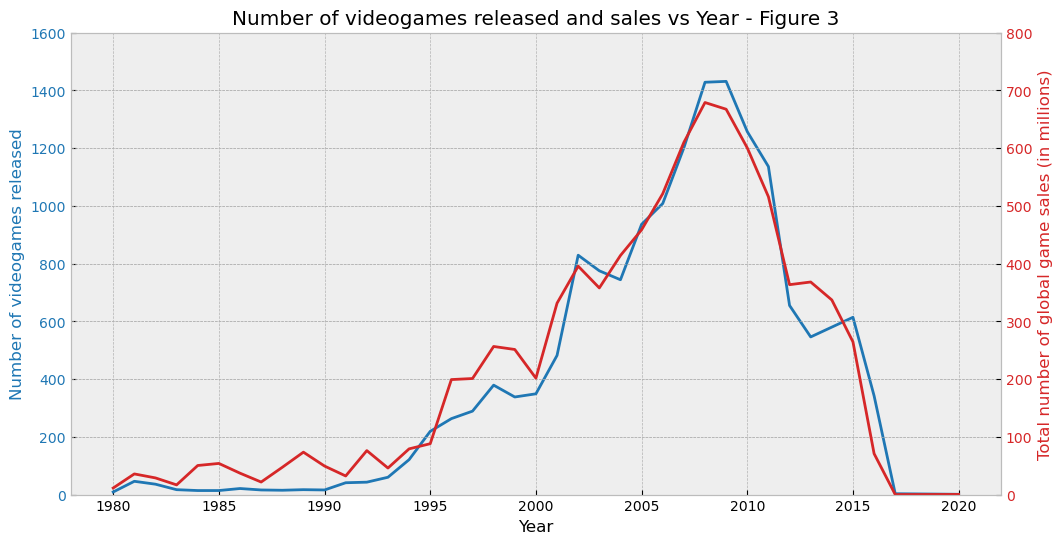

In [272]:
# Creating figure and axis object
fig, ax1 = plt.subplots()

# Setting figure sizes
fig.set_size_inches(12, 6)

# Create color blue
color_blue ='tab:blue'

# Count total number of games released each year
releases_count_year = game.groupby('Year').count()


# Create a lineplot of the number of game titles released by year
ax1.plot(yearlist, releases_count_year['Global_Sales'], color_blue)

# Set labels and format them
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of videogames released', color = color_blue)
ax1.set_title('Number of videogames released and sales vs Year - Figure 3')
ax1.tick_params(axis='y', labelcolor = color_blue)

# Set y range limit
ax1.set_ylim(0, 1600)

# Get the total number of global sales each year
global_sales_year = game.groupby('Year')['Global_Sales'].sum()

ax2 = ax1.twinx()

# Create color as red
color_red ='tab:red'

# Create a lineplot of the total global sales by year
ax2.plot(yearlist, global_sales_year, color_red)

# Set labels and format them
ax2.set_ylabel('Total number of global game sales (in millions)', color = color_red)
ax2.tick_params(axis='y', labelcolor = color_red)

# Set y range limit
ax2.set_ylim(0, 800)

plt.show()

In [273]:
# Creating DataFrame subset with only Nintendo Wii games
wii_df = game[game['Platform']=='Wii']
wii_df.name = 'wii_df'

# Creating DataFrame subset with only PS3 games
ps3_df = game[game['Platform']=='PS3']
ps3_df.name = 'ps3_df'

# Creating DataFrame subset with only Xbox360 games
x360_df = game[game['Platform']=='X360']
x360_df.name = 'x360_df'

# Creating a list with the 3 new DataFrames
gen7_consoles_df_list = [wii_df, ps3_df, x360_df]
gen7_consoles_df_list

# Creating empty dictionaries to store 7th generation console yearly sales and number of game releases
gen7_sales_dict = {}
gen7_releases_dict = {}

# Running a for loop to store key value pairs in the relevant dictionary
for platform_df in gen7_consoles_df_list:
    platform_sales = platform_df.groupby('Year')['Global_Sales'].sum()
    platform_releases = platform_df.groupby('Year')['Global_Sales'].count()
    
    key = platform_df.name + '_key'
    gen7_sales_dict[key] = platform_sales
    gen7_releases_dict[key] = platform_releases

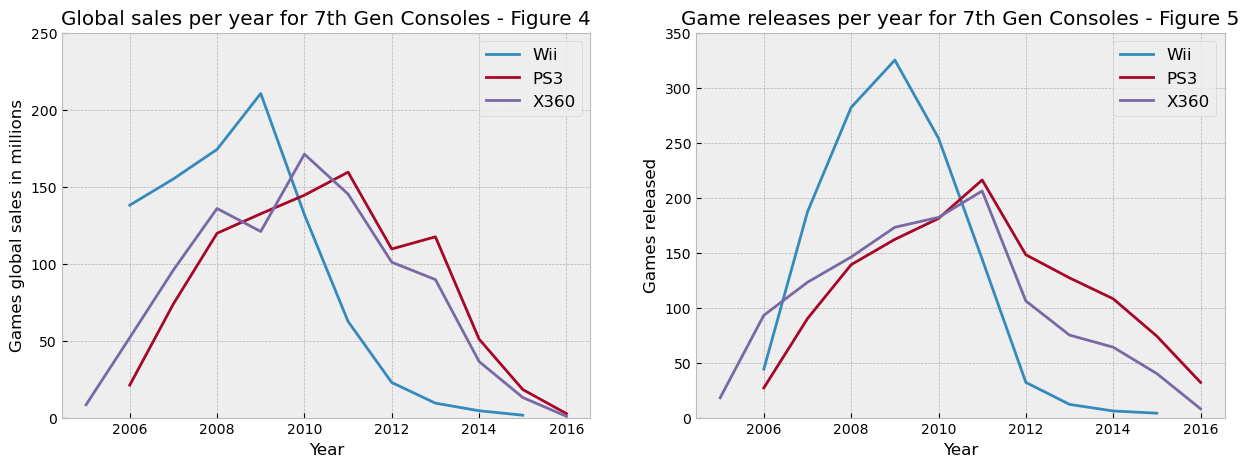

In [274]:
# Creating figure and axis object
fig, ax = plt.subplots(1, 2)

# Setting figure sizes
fig.set_size_inches(15, 5)

# Plotting global sales by year for 7th Gen consoles
ax[0].plot(gen7_sales_dict['wii_df_key'], label = 'Wii')
ax[0].plot(gen7_sales_dict['ps3_df_key'], label = 'PS3')
ax[0].plot(gen7_sales_dict['x360_df_key'], label = 'X360')

# Setting y-range
ax[0].set_ylim(0, 250)

# Adding legend
ax[0].legend(prop={'size':12})

# Setting labels
ax[0].set_title('Global sales per year for 7th Gen Consoles - Figure 4')
ax[0].set_ylabel('Games global sales in millions')
ax[0].set_xlabel('Year')

# Plotting number of games released by year for 7th Gen consoles
ax[1].plot(gen7_releases_dict['wii_df_key'], label = 'Wii')
ax[1].plot(gen7_releases_dict['ps3_df_key'], label = 'PS3')
ax[1].plot(gen7_releases_dict['x360_df_key'], label = 'X360')

# Setting y-range
ax[1].set_ylim(0, 350)

# Adding legend
ax[1].legend(prop={'size':12})

# Setting labels
ax[1].set_title('Game releases per year for 7th Gen Consoles - Figure 5')
ax[1].set_ylabel('Games released')
ax[1].set_xlabel('Year')

plt.show()

### __Insights on Relationship Between Videogame Releases, Sales and Year of Release__

- Figure 3 shows the number of yearly game releases and global sales closely follow one another, seeing similar levels of proportional increase and decrease. Between 1980 and 1990, there were very few videogames releases compared to what would follow in the next decades. From 1990 up until 2008, there is a significant gradual overall increase in the number of videogames produced and global sales, with a steeper decline in the numbers of both game release and sales in the years after.
- Figures 4 and 5 show that between the 3 7th Generation consoles (Wii, PS3 and Xbox360), the Wii had the most game sales and games released in 2007, 2008 and 2009, but sees a sharp decline in both moving into the following years. The PS3 and Xbox360 had similar levels of games sales and new releases since the videogame consoles' debut, and they follow each other closely in terms of sales and new game releases.